A1)


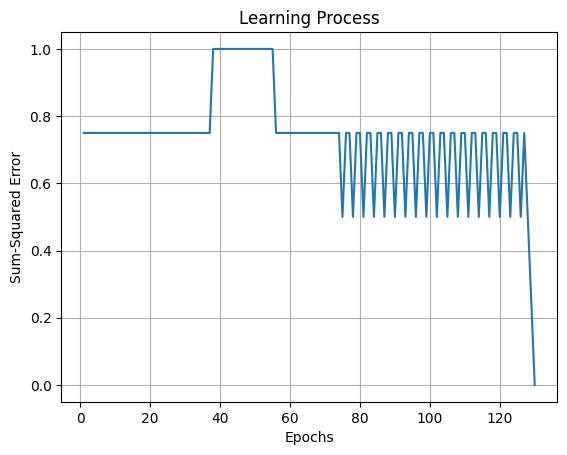

Input: [0 0] Predicted Output: 0
Input: [0 1] Predicted Output: 0
Input: [1 0] Predicted Output: 0
Input: [1 1] Predicted Output: 1


In [22]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def train(self, inputs, labels, epochs=1000):
        errors = []
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i])
                error = labels[i] - prediction
                total_error += error**2  # Square the error for sum-squared error
                self.weights[1:] += self.learning_rate * error * inputs[i]
                self.weights[0] += self.learning_rate * error

            # Calculate and store average error for the epoch
            average_error = total_error / len(inputs)
            errors.append(average_error)

            # Stop if convergence criterion is met
            if average_error <= 0.002:
                break

        return errors

# Initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Learning rate
learning_rate = 0.05

# AND gate inputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate labels
labels = np.array([0, 0, 0, 1])

# Initialize Perceptron
perceptron = Perceptron(initial_weights, learning_rate)

# Train Perceptron
errors = perceptron.train(inputs, labels)

# Plot epochs vs errors
epochs = np.arange(1, len(errors) + 1)  # Adjust for indexing
plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Learning Process")
plt.grid(True)
plt.show()

# Test the trained Perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in range(len(test_inputs)):
    prediction = perceptron.predict(test_inputs[i])
    print(f"Input: {test_inputs[i]} Predicted Output: {prediction}")


A2)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def bipolar_step_function(self, x):
        return np.where(x >= 0, 1, -1)

    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

    def relu_function(self, x):
        return np.maximum(0, x)

    def predict(self, inputs, activation_function):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if activation_function == 'bipolar_step':
            return self.bipolar_step_function(weighted_sum)
        elif activation_function == 'sigmoid':
            return self.sigmoid_function(weighted_sum)
        elif activation_function == 'relu':
            return self.relu_function(weighted_sum)

    def train(self, inputs, labels, activation_function, epochs=1000):
        errors = []
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i], activation_function)
                error = labels[i] - prediction
                total_error += error**2
                self.weights[1:] += self.learning_rate * error * inputs[i]
                self.weights[0] += self.learning_rate * error

            average_error = total_error / len(inputs)
            errors.append(average_error)

            if average_error <= 0.002:
                break

        return errors, epoch + 1

# Define initial weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# AND gate inputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate labels
labels = np.array([0, 0, 0, 1])

activation_functions = ['bipolar_step', 'sigmoid', 'relu']
iterations = {}

for activation_function in activation_functions:
    perceptron = Perceptron(initial_weights, learning_rate)
    errors, num_iterations = perceptron.train(inputs, labels, activation_function)
    iterations[activation_function] = num_iterations

# Print number of iterations taken to converge for each activation function
for activation_function, num_iterations in iterations.items():
    print(f"Iterations taken to converge for {activation_function} activation function: {num_iterations}")


Iterations taken to converge for bipolar_step activation function: 1000
Iterations taken to converge for sigmoid activation function: 1000
Iterations taken to converge for relu activation function: 16


A3)

A1 - Learning Rate: 0.05
Final weights: w0: -0.1000, w1: 0.1000, w2: 0.0500
Converged in 130 epochs


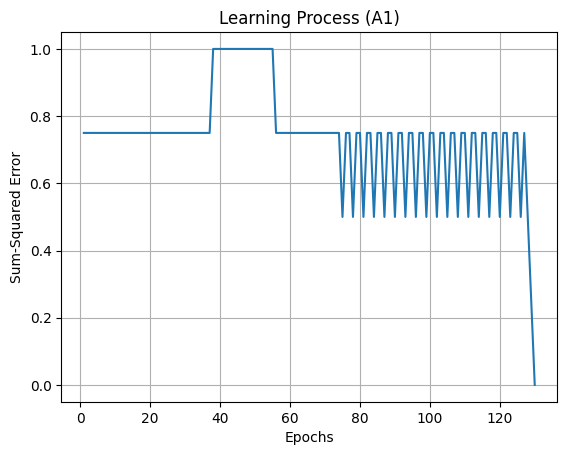

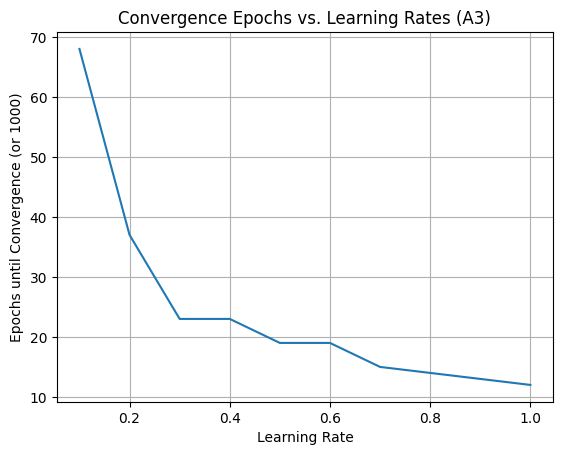

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, learning_rate, epochs=1000):
    w0 = 10
    w1 = 0.2
    w2 = -0.75

    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = w0 + np.dot(inputs[i], [w1, w2])
            predicted_output = step(weighted_sum)
            error = outputs[i] - predicted_output
            total_error += error**2

            w0 += learning_rate * error
            w1 += learning_rate * error * inputs[i][0]
            w2 += learning_rate * error * inputs[i][1]

        average_error = total_error / len(inputs)
        errors.append(average_error)

        if average_error <= 0.002:
            return w0, w1, w2, epoch + 1, errors

    return w0, w1, w2, epochs, errors

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

learning_rate = 0.05
w0, w1, w2, converged_epoch, errors = train_perceptron(inputs, outputs, learning_rate)

print("A1 - Learning Rate:", learning_rate)
print(f"Final weights: w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f}")
if converged_epoch < 1000:
    print(f"Converged in {converged_epoch} epochs")
else:
    print("Convergence not reached within 1000 epochs")

plt.plot(range(1, converged_epoch + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Learning Process (A1)")
plt.grid(True)
plt.show()

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_epochs = []
for lr in learning_rates:
    w0, w1, w2, converged_epoch, _ = train_perceptron(inputs, outputs, lr)
    convergence_epochs.append(converged_epoch if converged_epoch < 1000 else 1000)

plt.plot(learning_rates, convergence_epochs)
plt.xlabel("Learning Rate")
plt.ylabel("Epochs until Convergence (or 1000)")
plt.title("Convergence Epochs vs. Learning Rates (A3)")
plt.grid(True)
plt.show()


A4)

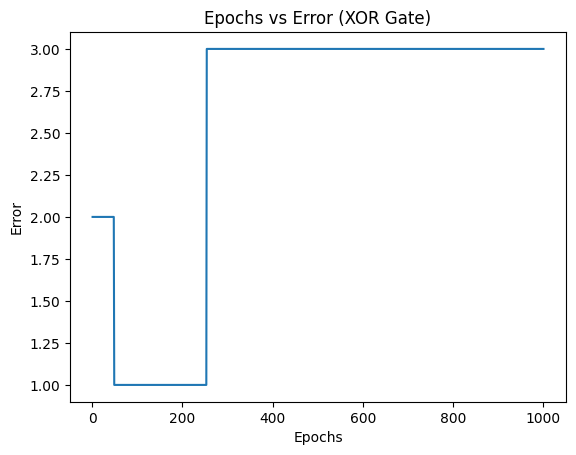

Number of epochs taken to converge (XOR Gate) - Bi-Polar Step: 1000
Number of epochs taken to converge (XOR Gate) - Sigmoid: 1000
Number of epochs taken to converge (XOR Gate) - ReLU: 1000


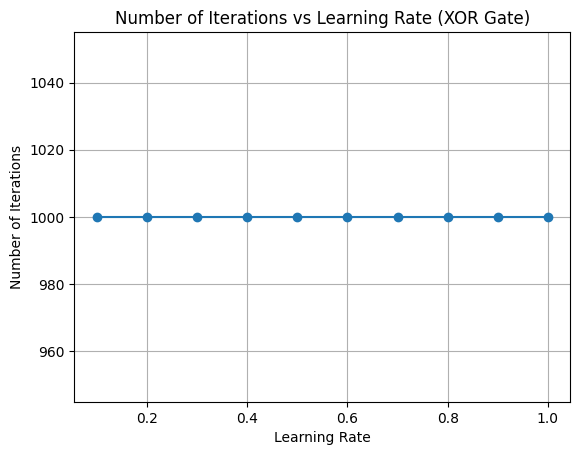

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return 1 if x >= 0 else 0

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

def calculate_error(X, Y, W):
    error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W[1:]) + W[0])
        error += (Y[i] - prediction) ** 2
    return error

W = initial_weights.copy()
errors_xor = []
for epoch in range(epochs):
    total_error = calculate_error(X, Y_xor, W)
    errors_xor.append(total_error)
    if total_error <= convergence_error:
        print("Converged after", epoch, "epochs")
        break
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W[1:]) + W[0])
        W[1:] += learning_rate * (Y_xor[i] - prediction) * X[i]
        W[0] += learning_rate * (Y_xor[i] - prediction)

plt.plot(range(1, epoch + 2), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (XOR Gate)')
plt.show()

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

def train_perceptron_xor(learning_rate, activation_function):
    W = initial_weights.copy()
    for epoch in range(epochs):
        total_error = calculate_error(X, Y_xor, W)
        if total_error <= convergence_error:
            return epoch
        for i in range(len(X)):
            prediction = activation_function(np.dot(X[i], W[1:]) + W[0])
            W[1:] += learning_rate * (Y_xor[i] - prediction) * X[i]
            W[0] += learning_rate * (Y_xor[i] - prediction)
    return epochs 

epochs_bipolar = train_perceptron_xor(learning_rate, bipolar_step_function)
epochs_sigmoid = train_perceptron_xor(learning_rate, sigmoid_function)
epochs_relu = train_perceptron_xor(learning_rate, relu_function)

print("Number of epochs taken to converge (XOR Gate) - Bi-Polar Step:", epochs_bipolar)
print("Number of epochs taken to converge (XOR Gate) - Sigmoid:", epochs_sigmoid)
print("Number of epochs taken to converge (XOR Gate) - ReLU:", epochs_relu)

learning_rates = np.arange(0.1, 1.1, 0.1)

def train_perceptron_varying_lr(learning_rate):
    W = initial_weights.copy()
    for epoch in range(epochs):
        total_error = calculate_error(X, Y_xor, W)
        if total_error <= convergence_error:
            return epoch
        for i in range(len(X)):
            prediction = step_function(np.dot(X[i], W[1:]) + W[0])
            W[1:] += learning_rate * (Y_xor[i] - prediction) * X[i]
            W[0] += learning_rate * (Y_xor[i] - prediction)
    return epochs 

iterations_xor = []
for learning_rate in learning_rates:
    iterations_xor.append(train_perceptron_varying_lr(learning_rate))

plt.plot(learning_rates, iterations_xor, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Learning Rate (XOR Gate)')
plt.grid(True)
plt.show()

A5) and A6)

In [26]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def initialize_weights(input_size):
    return np.random.randn(input_size, 1)

def predict(inputs, weights):
    return sigmoid(np.dot(inputs, weights))

def train_perceptron(inputs, labels, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights = initialize_weights(input_size)
    converged = False

    for epoch in range(epochs):
        predictions = predict(inputs, weights)
        error = labels - predictions
        weights += learning_rate * np.dot(inputs.T, error) / len(labels)
        
        # Check convergence
        if np.linalg.norm(error) < 0.001:
            converged = True
            break

    return weights, converged, epoch + 1

def train_pseudo_inverse(inputs, labels):
    inputs_with_bias = np.hstack((np.ones((inputs.shape[0], 1)), inputs))
    weights = np.dot(np.linalg.pinv(inputs_with_bias), labels)
    return weights

def calculate_accuracy(predictions, labels):
    correct = np.sum(predictions == labels)
    total = len(labels)
    accuracy = correct / total
    return accuracy

if __name__ == "__main__":
    customer_data = {
        'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
        'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
        'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
        'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
        'High_Value_Tx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
    }

    customer_df = pd.DataFrame(customer_data)

    inputs = np.array(customer_df.iloc[:, :-1])
    labels = np.array(customer_df['High_Value_Tx'].map({'Yes': 1, 'No': 0})).reshape(-1, 1)

    learning_rate = 0.01
    epochs = 1000

    # Train with perceptron
    weights_perceptron, converged, epochs_perceptron = train_perceptron(inputs, labels, learning_rate, epochs)
    classified_transactions_perceptron = ['Yes' if p >= 0.5 else 'No' for p in predict(inputs, weights_perceptron)]

    # Train with pseudo-inverse
    weights_pseudo_inverse = train_pseudo_inverse(inputs, labels)
    inputs_with_bias = np.hstack((np.ones((inputs.shape[0], 1)), inputs))
    predictions_pseudo_inverse = predict(inputs_with_bias, weights_pseudo_inverse)
    classified_transactions_pseudo_inverse = ['Yes' if p >= 0.5 else 'No' for p in predictions_pseudo_inverse]

    print("Weights after training with perceptron:")
    print(weights_perceptron)
    
    print("Weights obtained with matrix pseudo-inverse:")
    print(weights_pseudo_inverse)

    print("Number of epochs needed to converge with perceptron:", epochs_perceptron)

    print("Classified Transactions (Perceptron):", classified_transactions_perceptron)
    print("Classified Transactions (Pseudo-inverse):", classified_transactions_pseudo_inverse)

    # Calculate accuracy for perceptron
    accuracy_perceptron = calculate_accuracy(classified_transactions_perceptron, customer_df['High_Value_Tx'])

    # Calculate accuracy for pseudo-inverse
    accuracy_pseudo_inverse = calculate_accuracy(classified_transactions_pseudo_inverse, customer_df['High_Value_Tx'])

    print("Accuracy of Perceptron:", accuracy_perceptron)
    print("Accuracy of Pseudo-inverse:", accuracy_pseudo_inverse)


Weights after training with perceptron:
[[-8.60250039]
 [ 0.80530193]
 [-4.08435486]
 [ 0.99669598]]
Weights obtained with matrix pseudo-inverse:
[[ 0.1139903 ]
 [-0.02789923]
 [ 0.01473739]
 [-0.04323249]
 [ 0.00447248]]
Number of epochs needed to converge with perceptron: 1000
Classified Transactions (Perceptron): ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
Classified Transactions (Pseudo-inverse): ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
Accuracy of Perceptron: 0.9
Accuracy of Pseudo-inverse: 0.6


A7)

In [27]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

np.random.seed(42)
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))

bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = Y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error))
    if mse <= convergence_error:
        print("Converged after", epoch + 1, "epochs")
        break

# Print the final weights from input to hidden layer
print("Final Weights (A and B to H1 and H2):")
print(weights_input_hidden)

# Test the trained model
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print("Predicted Output:")
print(predicted_output)


Final Weights (A and B to H1 and H2):
[[0.06451605 1.36219877 0.61330808]
 [0.20046037 0.55969555 0.04895712]]
Predicted Output:
[[0.23496123]
 [0.26245501]
 [0.31164146]
 [0.33455935]]


A8)

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])

np.random.seed(42)
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))

bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = Y_xor - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error))
    if mse <= convergence_error:
        print("Converged after", epoch + 1, "epochs")
        break

# Print the final weights
print("Final weights from input neurons to hidden neurons:")
print(weights_input_hidden)

# Test the trained model for XOR gate
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print("Predicted Output for XOR Gate:")
print(predicted_output)


Weights: [-0.05271918 -0.01135706], Epochs: 100
Final Weights for XOR Gate: [-0.05271918 -0.01135706]
Errors during training: [2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


A9)

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.rand(input_size, hidden_size)
    W2 = np.random.rand(hidden_size, output_size)
    return W1, W2

# Forward propagation
def forward_propagate(X, W1, W2):
    z1 = np.dot(X, W1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2)
    a2 = sigmoid(z2)
    return a1, a2

# Backpropagation
def backpropagate(X, y, a1, a2, W1, W2):
    dA2 = (a2 - y) * sigmoid_derivative(a2)
    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(a1)
    dW2 = np.dot(a1.T, dA2)
    dW1 = np.dot(X.T, dA1)
    return dW1, dW2

# Train the neural network
def train_neural_network(X, y, learning_rate, epochs):
    input_size = X.shape[1]
    hidden_size = 4
    output_size = y.shape[1]
    W1, W2 = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        a1, a2 = forward_propagate(X, W1, W2)
        dW1, dW2 = backpropagate(X, y, a1, a2, W1, W2)
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
    return W1, W2

def test_neural_network(X, y, W1, W2):
    _, a2 = forward_propagate(X, W1, W2)
    predictions = np.round(a2)
    accuracy = np.mean(predictions == y)
    return accuracy

# Define input-output pairs for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]]) 

# Train the neural network
learning_rate = 0.05
epochs = 1000
W1, W2 = train_neural_network(X, y_and, learning_rate, epochs)

# Test the neural network
accuracy = test_neural_network(X, y_and, W1, W2)
print(f'Accuracy for AND Gate: {accuracy:.4f}')

# Print the final weights
print("Final weights:")
print("W1 (A to H1):")
print(W1)
print("W2 (B to H2):")
print(W2)

# Predict the output
_, output = forward_propagate(X, W1, W2)
print("Predicted output:")
print(np.round(output))


Accuracy for AND Gate: 0.7500
Final weights:
W1 (A to H1):
[[-0.56380904 -1.0345993  -2.47319355 -0.47327532]
 [-0.30046684 -0.85563711 -2.5040657  -0.21406834]]
W2 (B to H2):
[[ 0.4274334  -0.84275012]
 [ 1.05567936 -1.10027787]
 [ 2.00712768 -1.92800395]
 [ 0.7011809  -0.45086829]]
Predicted output:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


A10)

In [30]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the AND gate truth table
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create an MLPClassifier
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the model
mlp_and.fit(X_and, y_and)

# Test the model
test_data_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output_and = mlp_and.predict(test_data_and)

# Print the predicted output for the AND gate
print("Predicted output for AND gate:")
print(predicted_output_and)
# Define the XOR gate truth table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Test the model
test_data_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output_xor = mlp_xor.predict(test_data_xor)

# Print the predicted output for the XOR gate
print("Predicted output for XOR gate:")
print(predicted_output_xor)


Predicted output for AND gate:
[0 0 0 1]
Predicted output for XOR gate:
[1 1 1 1]


c:\Users\mvy48\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


A 11)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data_path = "C:/Users/mvy48/OneDrive/Desktop/vscodeprograms/ml_labsessions/lab4/DCT_malayalam_char 1.xlsx"
dataset = pd.read_excel(data_path)

X = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8669
